In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams.update({'font.size':16}) 


In [2]:
exo_df = pd.read_csv("../data/Exoplanet_catalog_2019.csv")
exo_df.rename(columns={'# name':'name'}, inplace=True)
planet_df = exo_df[['name', 'orbital_period', 'semi_major_axis', 'detection_type', 'star_mass']].dropna()


# Analysing dataframes


**Questions**
- How do you plot the data in a dataframe?
- How do you operate on columns?
- How do you add new data?

**Objectives**
- Create some histograms of the exoplanet data
- Add new columns to the dataframe
- Confirm Kepler's 3rd law

In this section we'll be analysing the data in the cleaned `planet_df` dataframe.

If you haven't already, set up a dataframe called `planet_df` that contains the five columns described in the [previous section](02_cleaning_data.ipynb) with rows with missing data removed.

In [3]:
planet_df

,name,orbital_period,semi_major_axis,detection_type,star_mass
0,11 Com b,326.030000,1.290000,Radial Velocity,2.700
1,11 UMi b,516.220000,1.540000,Radial Velocity,1.800
2,14 And b,185.840000,0.830000,Radial Velocity,2.200
3,14 Her b,1773.400000,2.770000,Radial Velocity,0.900
4,16 Cyg B b,799.500000,1.680000,Radial Velocity,1.010
5,18 Del b,993.300000,2.600000,Radial Velocity,2.300
6,1SWASP J1407 b,3725.000000,3.900000,Primary Transit,0.900
7,24 Boo b,30.350600,0.190000,Radial Velocity,0.990
8,24 Sex b,452.800000,1.333000,Radial Velocity,1.540
9,24 Sex c,883.000000,2.080000,Radial Velocity,1.540


## Information: Module imports
From this point forward any `import` statements will be at the top of these notebook pages rather than included as we go along. It's good practice to import any modules you are going to use at the top of a notebook. I tend to import `pandas`, `numpy` and `matplotlib.pyplot` in most notebooks I use, so I always put those at the top. If you find you need other modules later on you can always add them to the top cell and re-run it to import the new modules.

If we need to use any new modules later (for example, we may use `astropy` later) will be imported at the place they're first used. 

As we're making plots we'll need `matplotlib.pyplot`, so go ahead and import it at the top of your notebook.

First let's make some histograms. Everyone loves a histogram! 

`pandas` works well with `matplotlib`, so we can make a histogram quite easily. To make a histogram of orbital periods we can just use

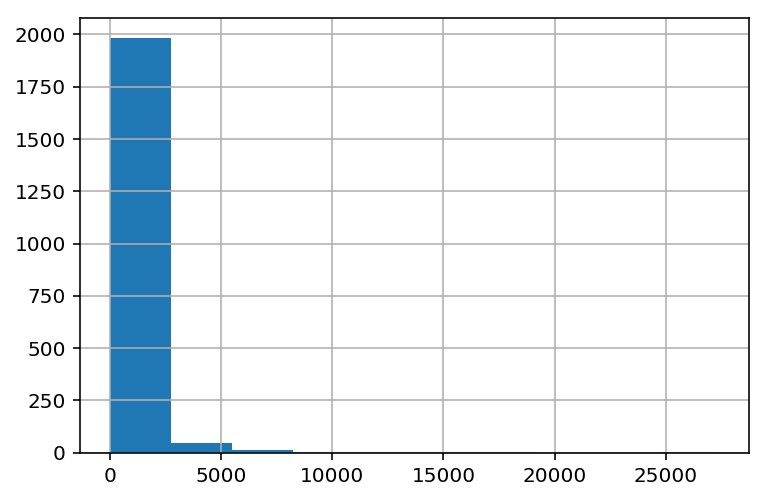

In [4]:
planet_df['orbital_period'].hist()

Using the `hist` function built into dataframes is good for getting a quick look at our data, but it's not particularly pretty. `matplotlib` made much nicer plots. We can make a histogram of the periods in the same way we would with a normal variable; this time we just pass it the dataframe column we're interested in.

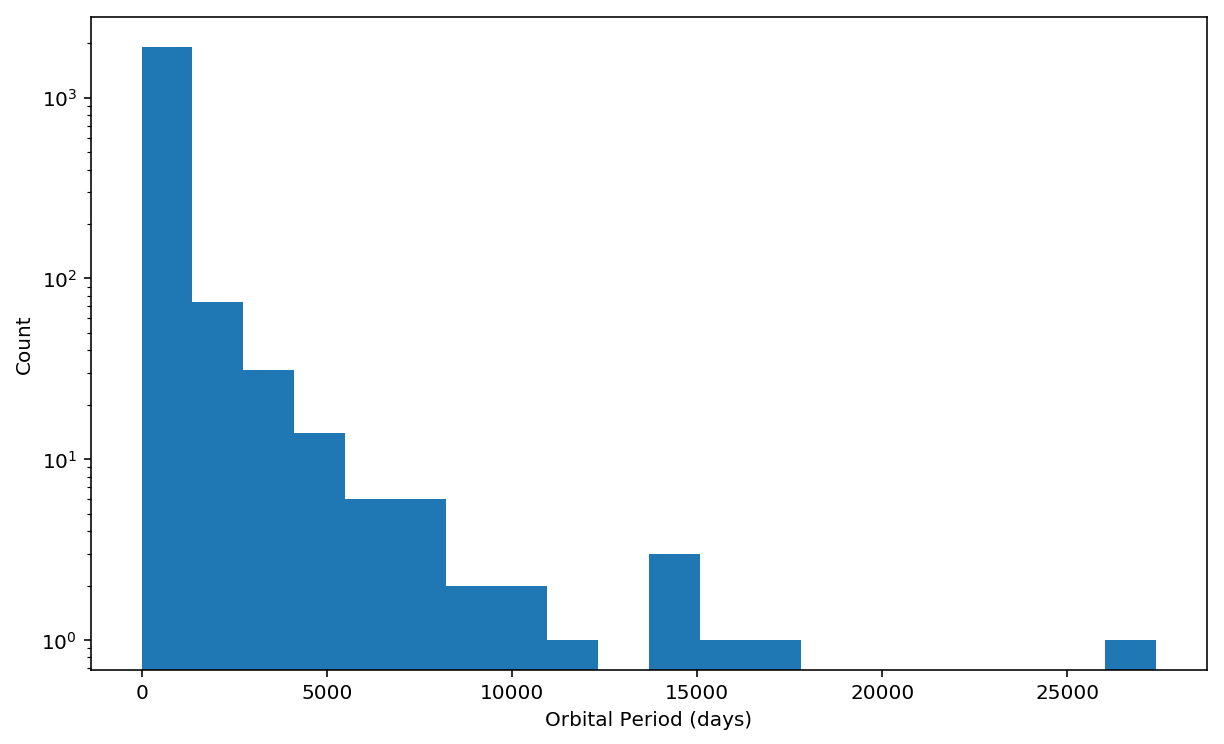

In [5]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.hist(planet_df['orbital_period'], bins=20)
ax.set_xlabel('Orbital Period (days)')
ax.set_ylabel('Count')
ax.set_yscale('log') ## set the y-axis to log scale so we can see the details
plt.show()

But what if we want to make two histograms to compare the different detection methods? We can use the `where` function in `pandas`.

In [6]:
planet_df['orbital_period'].where(planet_df['detection_type']=='Radial Velocity')

0         326.03000
1         516.22000
2         185.84000
3        1773.40000
4         799.50000
5         993.30000
6               NaN
7          30.35060
8         452.80000
9         883.00000
10        335.10000
11              NaN
12        269.30000
13        479.10000
14       1078.00000
15       2391.00000
16      14002.00000
17          4.23080
18         14.65314
19         44.37300
20       4867.00000
21              NaN
22        260.91000
23        899.00000
24          4.21500
25         38.02100
26        123.01000
27        988.90000
28        736.90000
29        116.67000
           ...     
3801      751.90000
3802      428.50000
3803      903.30000
3804      415.20000
3805      964.60000
3806     1251.00000
3808      136.75000
3809      643.25000
3810        9.63860
3811      310.55000
3812     4205.80000
3813      357.80000
3814      530.21000
3815     3184.83000
3816      277.02000
3817      187.30000
3818     1630.00000
3819     2091.20000
3820            NaN


Here we're using a logical expression on one column 
```py
planet_df['detection_type']=='Radial Velocity'
```
to determine which rows of another column we want to select.

Now we can make two histograms to compare the period distribtions from the different techniques.

/Users/vs522/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/vs522/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


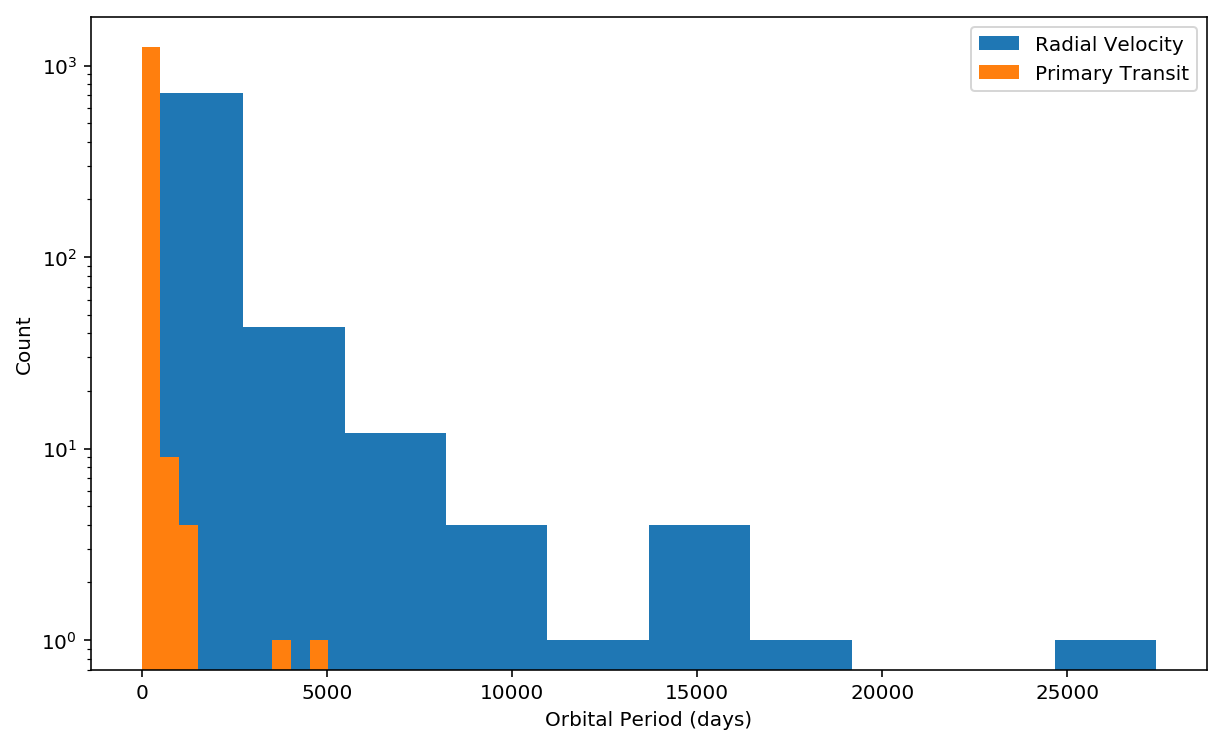

In [7]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.hist(planet_df['orbital_period'].where(planet_df['detection_type']=='Radial Velocity'), label='Radial Velocity')
ax.hist(planet_df['orbital_period'].where(planet_df['detection_type']=='Primary Transit'), label='Primary Transit')
ax.set_xlabel('Orbital Period (days)')
ax.set_ylabel('Count')
ax.set_yscale('log') ## set the y-axis to log scale so we can see the details
ax.legend()
plt.show()

Getting there! 

To do a meaningful comparison we should make sure the histogram bins are the same for the two plots. 

We can check the minimum and maxmimum values of the period using the `min()` and `max()` functions

In [8]:
planet_df['orbital_period'].min()


0.07943002

In [9]:
planet_df['orbital_period'].max()

27400.0

I reckon 30 bins will be enough, so I'll make an array for my bin edges that goes from 0 to the maxmimum value and has `nbins+1` elements. Then I can use that for the `bins` parameter in `plt.hist`.

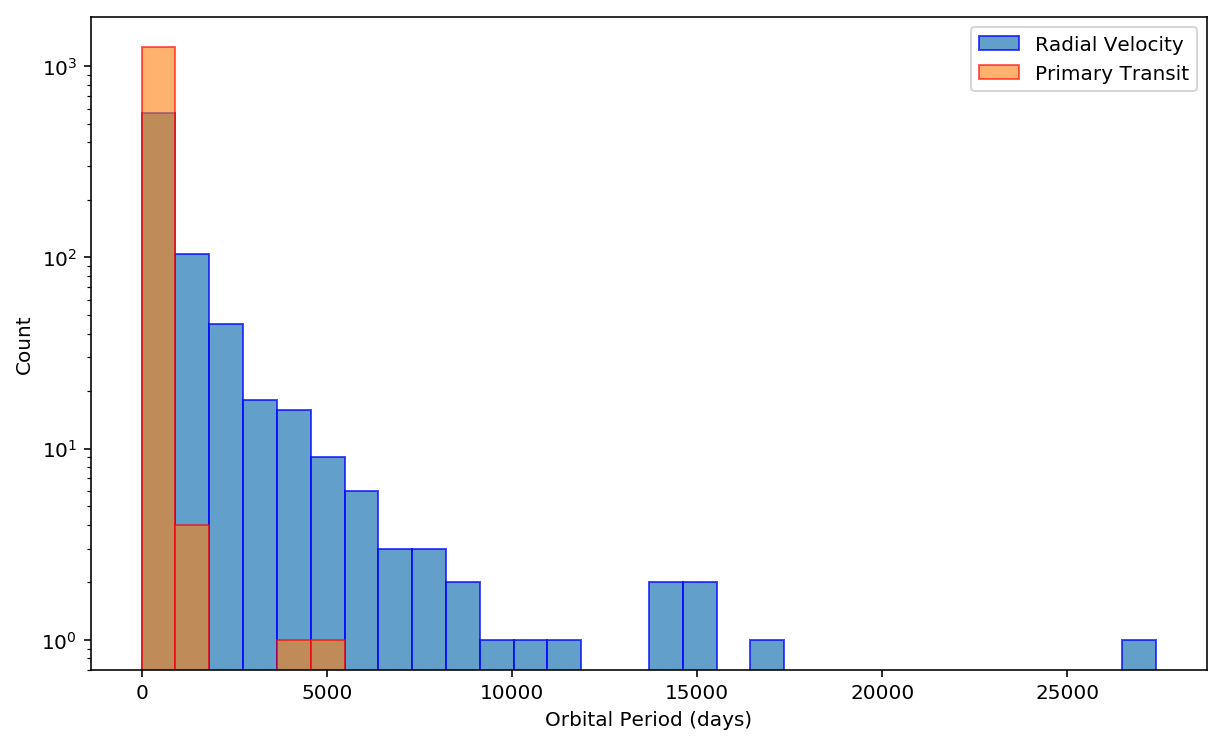

In [10]:
bins = np.linspace(0,planet_df['orbital_period'].max(), 31)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.hist(planet_df['orbital_period'].where(planet_df['detection_type']=='Radial Velocity'), bins=bins, label='Radial Velocity', alpha=0.7, edgecolor='blue')
ax.hist(planet_df['orbital_period'].where(planet_df['detection_type']=='Primary Transit'), bins=bins, label='Primary Transit', alpha=0.6, edgecolor='red')
ax.set_xlabel('Orbital Period (days)')
ax.set_ylabel('Count')
ax.set_yscale('log') ## set the y-axis to log scale so we can see the details
ax.legend()
plt.show()

With the bins having the same width for each dataset we can be confident that there really are more planets in the first bin that were detected with the transit technique than for the radial velocity technique.

The other change I made to this plot was to make the bars semi-transparent. When you plot multiple datasets on the same plot with `matplotlib` it plots them in the order you say with the second dataset is plotted over the top of the first. However, that means that some data will be hidden on the plot. If we didn't change the transparency we wouldn't be able to see how many radial velocity detections were in the first bin; all we'd know was that there must be less than (or equal to) the number of transit detections. 

The transparency is controlled by the `alpha` argument in the plotting function, where `alpha=1` corresponds to completely opaque (the default value) and `alpha=0` is completely transparent. You can play around with these values to until you have something that looks right. 

Remember, the point of plots is to **tell a convincing story that supports your conclusions**. You can't tell a convincing story if your data can't be seen (or if your plot doesn't have axis labels, or units, or various other things that I will rant about over the next 3-4 years of your degree course....)

## Exercise: Mass histograms

Create histograms showing the number of planets detected as a function of star mass for each detection method for stars with masses below the mass of the Sun (i.e. $M <= 1 M_\odot$). Both detection methods should be shown on the same plot. Your plot should have axis labels, units, a legend and a sensible title. In a markdown cell directly below your plot, write a caption summarising the key point that a reader should take away from your figure.

Repeat this (all of it, including the caption) for stars with masses between 1 $M_\odot$ and 5 $M_\odot$.  

**Hint:** Remember you can create a new dataframe by selecting rows/columns from an existing dataframe. 


[solution]()

## Solution+: Mass histograms

Below is an example solution for stars with $M < M_{\odot}$. First I created a new dataframe with just the low mass stars. I then created the histograms and the caption.


In [11]:
low_mass_df = planet_df.where(planet_df['star_mass'] <=1.0).dropna()

In [12]:
low_mass_df

,name,orbital_period,semi_major_axis,detection_type,star_mass
3,14 Her b,1773.400000,2.770000,Radial Velocity,0.900
6,1SWASP J1407 b,3725.000000,3.900000,Primary Transit,0.900
7,24 Boo b,30.350600,0.190000,Radial Velocity,0.990
13,42 Dra b,479.100000,1.190000,Radial Velocity,0.980
24,61 Vir b,4.215000,0.050201,Radial Velocity,0.950
25,61 Vir c,38.021000,0.217500,Radial Velocity,0.950
26,61 Vir d,123.010000,0.476000,Radial Velocity,0.950
29,70 Vir b,116.670000,0.480000,Radial Velocity,0.920
36,AS 205 A b,24.840000,0.162000,Radial Velocity,0.900
38,BD+14 4559 b,268.940000,0.777000,Radial Velocity,0.860


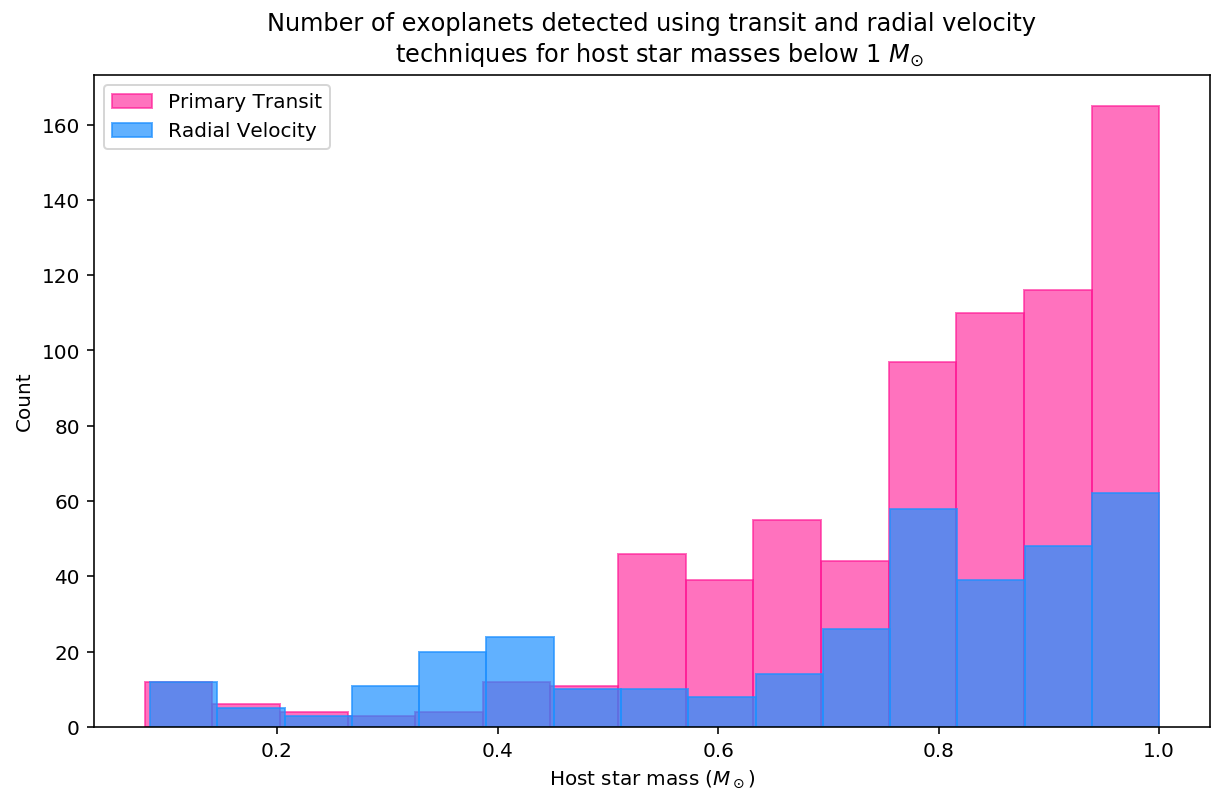

In [13]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.hist(low_mass_df['star_mass'].where(low_mass_df['detection_type']=='Primary Transit'), bins=15, label='Primary Transit', alpha=0.6, color='DeepPink', edgecolor='DeepPink')
ax.hist(low_mass_df['star_mass'].where(low_mass_df['detection_type']=='Radial Velocity'), bins=15, label='Radial Velocity', alpha=0.7, color='DodgerBlue', edgecolor='DodgerBlue')
ax.set_xlabel('Host star mass ($M_\odot$)')
ax.set_ylabel('Count')
ax.legend()
ax.set_title('Number of exoplanets detected using transit and radial velocity\n  techniques for host star masses below 1 $M_{\odot}$')
plt.show()

**Number of exoplanets detected as a function of host star mass and detection technique for low mass ($M < 1 M_\odot$) stars.** Pink bars denote exoplanets detected using primary transit observations. Blue bars denote those detected using radial velocity measurements. The fraction of stars detected using primary transit is higher for low mass stars.

:solution+

# Kepler's 3rd law

The last part of your coursework was to confirm Kepler's 3rd law:

$$
T^2 = \dfrac{4 \pi^2}{G} \dfrac{a^3}{M_*}
$$

where $T$ is the orbital period, $G$ is the gravitational constant, $a$ is the semi-major axis and $M_*$ is the mass of the host star. You were asked to plot $T^2$ as a function of $\dfrac{a^3}{M_*}$ and do a least-squares fit to find $G$. We're going to repeat that analysis here, taking advantage of the functionality of dataframes.


The first thing you were asked to do was to remove any objects that had periods greater than 10,000 days or host star masses below 0.7 $M_\odot$.

# Exercise: Clean your data

Starting from the `planet_df` dataframe, make a new dataframe with objects with periods greater than 10,000 days or host star masses below 0.7 $M_\odot$ removed. You can call the dataframe whatever you like; I'll call mine `kepler_df`.

[solution]()

# Solution+: Clean your data

In [14]:
kepler_df = planet_df.where((planet_df['orbital_period'] <= 10000) & (planet_df['star_mass'] > 0.7)).dropna()

In [15]:
kepler_df

,name,orbital_period,semi_major_axis,detection_type,star_mass
0,11 Com b,326.030000,1.290000,Radial Velocity,2.700
1,11 UMi b,516.220000,1.540000,Radial Velocity,1.800
2,14 And b,185.840000,0.830000,Radial Velocity,2.200
3,14 Her b,1773.400000,2.770000,Radial Velocity,0.900
4,16 Cyg B b,799.500000,1.680000,Radial Velocity,1.010
5,18 Del b,993.300000,2.600000,Radial Velocity,2.300
6,1SWASP J1407 b,3725.000000,3.900000,Primary Transit,0.900
7,24 Boo b,30.350600,0.190000,Radial Velocity,0.990
8,24 Sex b,452.800000,1.333000,Radial Velocity,1.540
9,24 Sex c,883.000000,2.080000,Radial Velocity,1.540


Check that we've actually got what we want by looking at the data:

In [16]:
kepler_df['orbital_period'].max()

9018.0

In [17]:
kepler_df['star_mass'].min()

0.7070000000000001

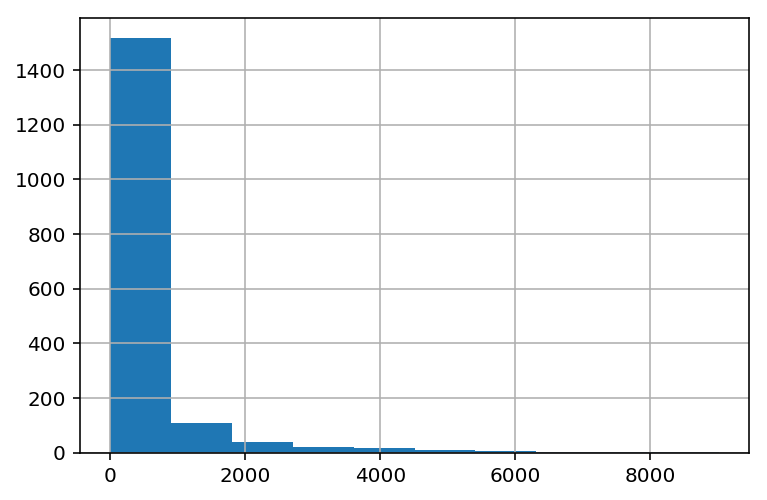

In [18]:
kepler_df['orbital_period'].hist()

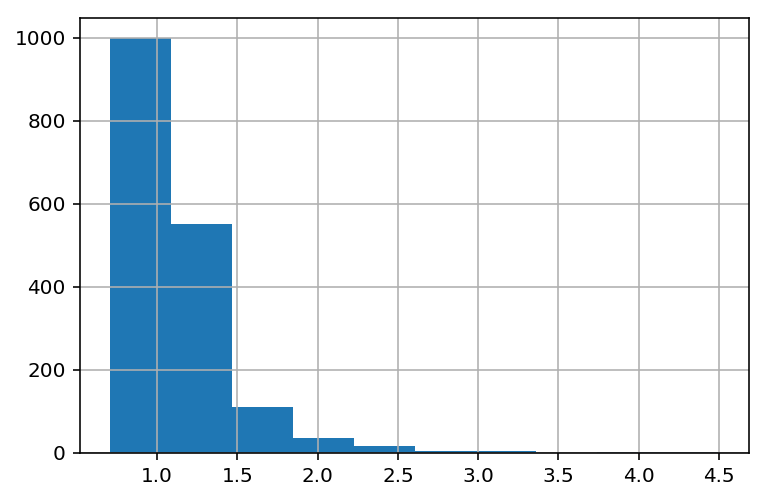

In [19]:
kepler_df['star_mass'].hist()

(Yes, I am aware the plots aren't pretty. These aren't supposed to be. Get in the habit of making quick and dirty plots to look at your data)

:solution+

For the next step, plotting $T^2$ as a function of $\dfrac{a^3}{M_*}$ and doing a least-squares fit, we could just use the dataframe as it is. But writing all that out would get complicated. Instead, we can add some new columns to our dataframe to contain the $T^2$ and $\dfrac{a^3}{M_*}$ values. Creating a new column is straightforward. 

For the $T^2$ column we just set the new column `kepler_df['T_sq']` to be the `orbital_period` column squared. Again, the same process we would use if we wanted to create an array called `T_sq` that was the square of an `orbital_period` array. 

In [20]:
kepler_df['T_sq'] = kepler_df['orbital_period']**2

In [21]:
kepler_df

,name,orbital_period,semi_major_axis,detection_type,star_mass,T_sq
0,11 Com b,326.030000,1.290000,Radial Velocity,2.700,1.062956e+05
1,11 UMi b,516.220000,1.540000,Radial Velocity,1.800,2.664831e+05
2,14 And b,185.840000,0.830000,Radial Velocity,2.200,3.453651e+04
3,14 Her b,1773.400000,2.770000,Radial Velocity,0.900,3.144948e+06
4,16 Cyg B b,799.500000,1.680000,Radial Velocity,1.010,6.392002e+05
5,18 Del b,993.300000,2.600000,Radial Velocity,2.300,9.866449e+05
6,1SWASP J1407 b,3725.000000,3.900000,Primary Transit,0.900,1.387562e+07
7,24 Boo b,30.350600,0.190000,Radial Velocity,0.990,9.211589e+02
8,24 Sex b,452.800000,1.333000,Radial Velocity,1.540,2.050278e+05
9,24 Sex c,883.000000,2.080000,Radial Velocity,1.540,7.796890e+05


# Exercise: Add another column

Add another new column to your `kepler_df` dataframe containing the values of $\dfrac{a^3}{M_*}$. Give the new column a sensible name. I'll call this column `a_3_m`.

[solution]()

# Solution+: Add another column

The process is the same as for adding the $T^2$ column.

In [22]:
kepler_df['a_3_m'] = kepler_df['semi_major_axis']**3 / kepler_df['star_mass']

In [23]:
kepler_df

,name,orbital_period,semi_major_axis,detection_type,star_mass,T_sq,a_3_m
0,11 Com b,326.030000,1.290000,Radial Velocity,2.700,1.062956e+05,0.795070
1,11 UMi b,516.220000,1.540000,Radial Velocity,1.800,2.664831e+05,2.029036
2,14 And b,185.840000,0.830000,Radial Velocity,2.200,3.453651e+04,0.259903
3,14 Her b,1773.400000,2.770000,Radial Velocity,0.900,3.144948e+06,23.615481
4,16 Cyg B b,799.500000,1.680000,Radial Velocity,1.010,6.392002e+05,4.694685
5,18 Del b,993.300000,2.600000,Radial Velocity,2.300,9.866449e+05,7.641739
6,1SWASP J1407 b,3725.000000,3.900000,Primary Transit,0.900,1.387562e+07,65.910000
7,24 Boo b,30.350600,0.190000,Radial Velocity,0.990,9.211589e+02,0.006928
8,24 Sex b,452.800000,1.333000,Radial Velocity,1.540,2.050278e+05,1.538047
9,24 Sex c,883.000000,2.080000,Radial Velocity,1.540,7.796890e+05,5.843449


:solution+

You should now have a dataframe that looks something like this:

In [24]:
kepler_df

,name,orbital_period,semi_major_axis,detection_type,star_mass,T_sq,a_3_m
0,11 Com b,326.030000,1.290000,Radial Velocity,2.700,1.062956e+05,0.795070
1,11 UMi b,516.220000,1.540000,Radial Velocity,1.800,2.664831e+05,2.029036
2,14 And b,185.840000,0.830000,Radial Velocity,2.200,3.453651e+04,0.259903
3,14 Her b,1773.400000,2.770000,Radial Velocity,0.900,3.144948e+06,23.615481
4,16 Cyg B b,799.500000,1.680000,Radial Velocity,1.010,6.392002e+05,4.694685
5,18 Del b,993.300000,2.600000,Radial Velocity,2.300,9.866449e+05,7.641739
6,1SWASP J1407 b,3725.000000,3.900000,Primary Transit,0.900,1.387562e+07,65.910000
7,24 Boo b,30.350600,0.190000,Radial Velocity,0.990,9.211589e+02,0.006928
8,24 Sex b,452.800000,1.333000,Radial Velocity,1.540,2.050278e+05,1.538047
9,24 Sex c,883.000000,2.080000,Radial Velocity,1.540,7.796890e+05,5.843449


Again, this is where the markdown cells come in handy. `a_3_m` makes perfect sense to me now, but will I remember what that column corresponds to a couple of months (or hours...) from now? Probably not. So add a markdown cell with the details of what you're doing and why when you're adding new columns.

We can now make the $T^2$ vs $\dfrac{a^3}{M_*}$ plot very simply using our two new columns:

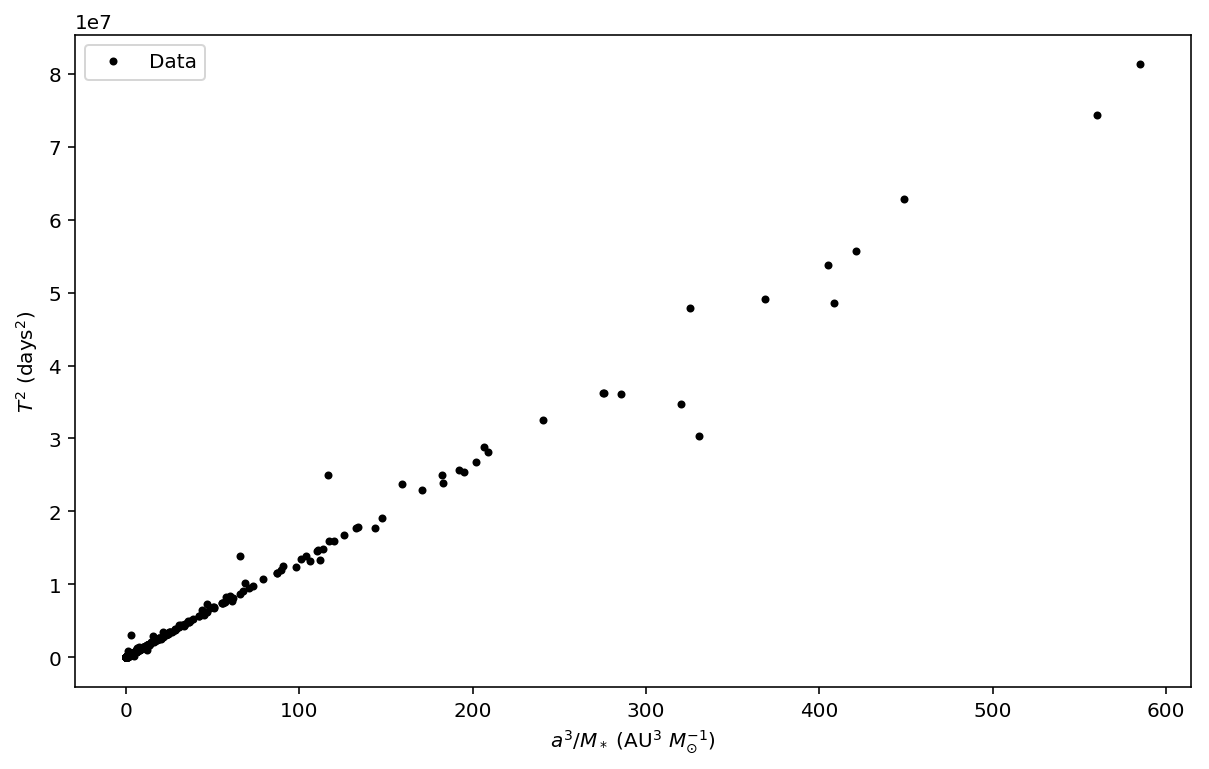

In [25]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(kepler_df['a_3_m'], kepler_df['T_sq'], 'k.',ls='None', label='Data')
ax.set_ylabel('$T^2$ (days$^2$)')
ax.set_xlabel('$a^3 / M_*$ (AU$^3$ $M_{\odot}^{-1}$)')
ax.legend()
plt.show()

This looks kind of how we would expect. But the units are horrible and we still need to do a least-squares fit. Let's add some new columns to the dataframe with sensible units. We'll need to convert the semi-major axis to m, the masses to kg and the periods to seconds. We could probably just convert the new columns we've just made, but doing this step by step will save your sanity in the long run.

The conversions we need are:

- 1 AU = $1.496 \times 10^{11}$ m
- 1 $M_\odot = 1.989 \times 10^{30}$ kg
- 1 d = ..... s (this is an exercise for the reader)

# Exercise: Convert to sensible units

Create three new columns for `orbital_period_sec`, `a_metres` and `mass_kg`. Use these columns to recalculate the `T_sq` and `a_3_m` columns. Replot these new columns, updating your figure to have the correct units on the axis labels.

[solution]()

# Solution+:

In [26]:
kepler_df['orbital_period_sec'] = kepler_df['orbital_period'] * 24. * 60. * 60.
kepler_df['a_metres'] = kepler_df['semi_major_axis'] * 1.496E11
kepler_df['mass_kg'] = kepler_df['star_mass'] * 1.989E30

In [27]:
kepler_df['a_3_m'] = kepler_df['a_metres']**3 / kepler_df['mass_kg']
kepler_df['T_sq'] = kepler_df['orbital_period_sec']**2

:solution+

If everything worked correctly you should end up with a figure that looks something like this:

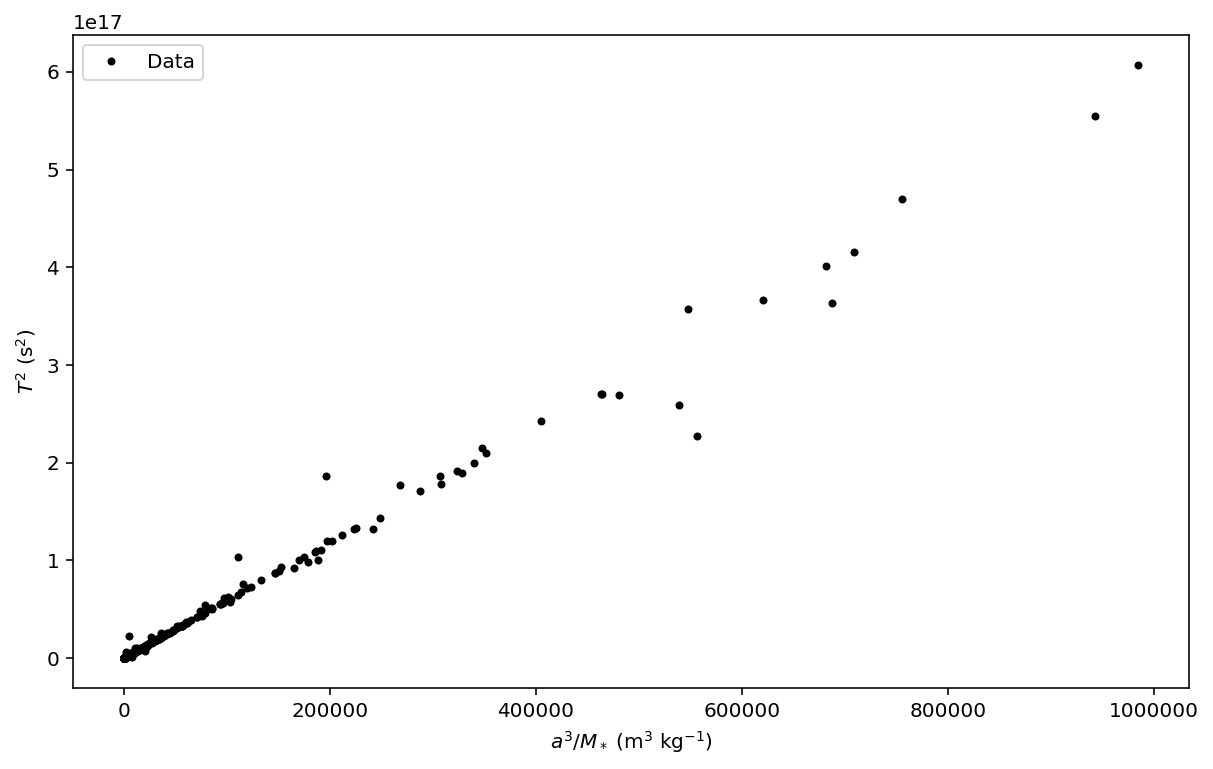

In [28]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(kepler_df['a_3_m'], kepler_df['T_sq'], 'k.',ls='None', label='Data')
ax.set_ylabel('$T^2$ (s$^2$)')
ax.set_xlabel('$a^3 / M_*$ (m$^3$ kg$^{-1}$)')
ax.legend()
plt.show()

The last thing to do is the least-squares fit to estimate $G$. 

# Exercise: Estimate $G \pm \sigma_G$

Use `curve_fit` to find an estimate of $G$ and its uncertainty. Add the best-fit line to your plot (and your legend). Add your value for $G \pm \sigma_G$ to the plot title. Tidy up your plot and write a caption in a markdown cell next to it. 

[solution]()

# Solution+: Estimate $G \pm \sigma_G$

We're using `curve_fit`, so we need to import it. Remember to add the import statement to the top of your notebook if you don't already have it loaded.

First things first, define the function that we want to fit. We're estimating $G$ by rearranging the equation for Kepler's 3rd law:

$$
T^2 = \dfrac{4 \pi^2}{G} \dfrac{a^3}{M_*}
$$


Our function is then


In [29]:
def keplers_law(a_3_m, g):
    return (4.0 * np.pi**2  * a_3_m / g)
    

Now we use `curve_fit` to find $G$ and $\sigma_G$

**Note:** The first (few...) times I tried this it didn't work. `curve_fit` got a very strange answer. By providing a starting guess with the `p0` parameter the fit worked properly. The problem was the very large numbers ($10^6$ and $10^{17}$). As we can see from the units in the $T^2$ equation, $G$ will be approximately $\dfrac{10^6}{10^{17}} = 10^{-11}$ m$^{3}$ kg$^{-1}$ s$^{-2}$, so `p0=1e-11` is a reasonable starting guess.

In [30]:
popt, pcov = curve_fit(keplers_law, (kepler_df['a_3_m']), (kepler_df['T_sq']), p0=1e-11)

g = popt[0] 
g_unc = np.sqrt(pcov[0][0])

print("G = {0:.3e} +/- {1:.3e}".format(g, g_unc))


G = 6.753e-11 +/- 1.591e-13


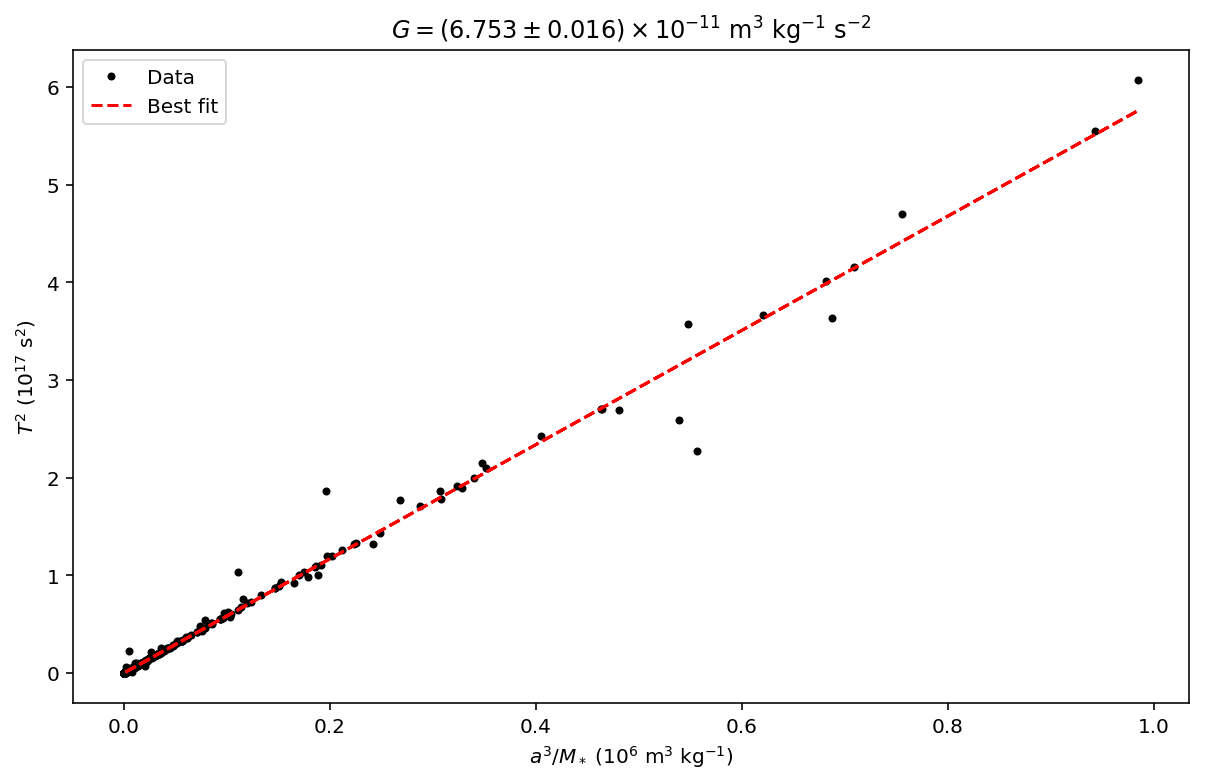

In [31]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(kepler_df['a_3_m']/1e6, kepler_df['T_sq'] / 1e17, 'k.',ls='None', label='Data')
ax.plot(kepler_df['a_3_m']/1e6, keplers_law(kepler_df['a_3_m'], g)/1e17, 'r--', label='Best fit')

ax.set_ylabel('$T^2$ ($10^{17}$ s$^2$)')
ax.set_xlabel('$a^3 / M_*$ ($10^6$ m$^3$ kg$^{-1}$)')

title_string = (r'$G = ({0:.3f} \pm {1:.3f}) \times 10^{{-11}}$ m$^{{3}}$ kg$^{{-1}}$ s$^{{-2}}$'.format((g / 1e-11), (g_unc / 1e-11)))
ax.set_title(title_string)
ax.legend()
plt.show()

:solution+

You should end up with something that looks like this:

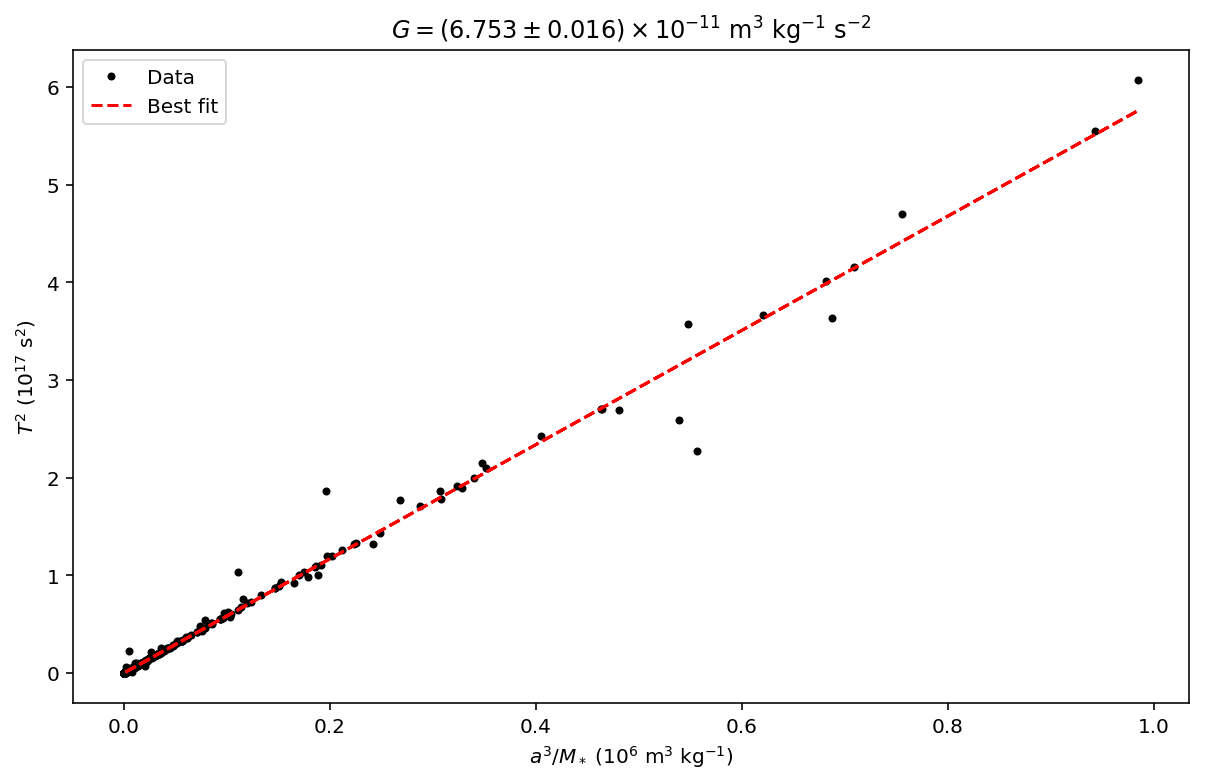

In [32]:
fig

## Key Points:
- 